# Create a Linear Model

## Linear model using scikit-learn

Here, we will work with one of the simplest types of machine learning models: a [**linear regression model**](https://en.wikipedia.org/wiki/Linear_regression).
Compared to more complex models, in particular Deep Learning models, linear regression works fairly intuitively and its predictions can easily be explained ("explainable AI"). However, linear regression models are not well suited to handle very complex and/or non-linear data.

[sklearn.linear_model.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

First, import `LinearRegression` from the library **scikit-learn**. `LinearRegression` is a Python 'class'.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Next, use the class to create an object of type LinearRegression.

### Dataset
Here we will use some generated (but somewhat realistic) data. The features in `X` are: 

- Age: (years)
- Systolic_BP: Systolic blood pressure (mmHg)
- Diastolic_BP: Diastolic blood pressure (mmHg)
- Cholesterol: (mg/DL)

The labels in `y` indicate whether the patient has a disease (diabetic retinopathy).
- y = 1 : patient has retinopathy.
- y = 0 : patient does not have retinopathy.

**Retinopathy** means damage to the retina of the eye (see [wikipedia entry](https://en.wikipedia.org/wiki/Retinopathy)).

## Import and explore the data 
Explore the data by viewing the features and the labels.

In [3]:
X = pd.read_csv("data/blood_pressure_fake_data.csv")
y = pd.read_csv("data/blood_pressure_fake_labels.csv")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Systolic_BP'}>],
       [<Axes: title={'center': 'Diastolic_BP'}>,
        <Axes: title={'center': 'Cholesterol'}>]], dtype=object)

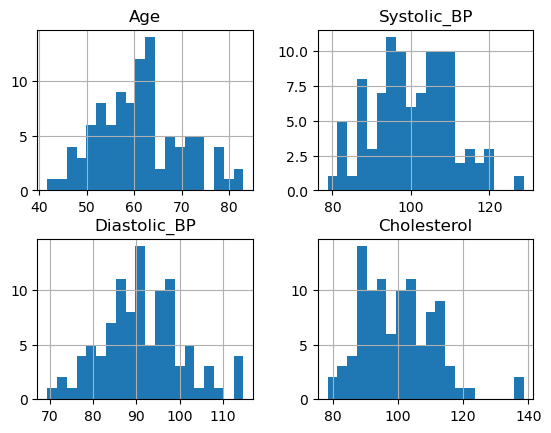

In [29]:
# View the features ... and plot some histograms
# X.head()
# X.describe()
# X.info()
# X["Age"].hist
X.hist(bins=20)

Also take a look at the labels

array([[<Axes: title={'center': 'y'}>]], dtype=object)

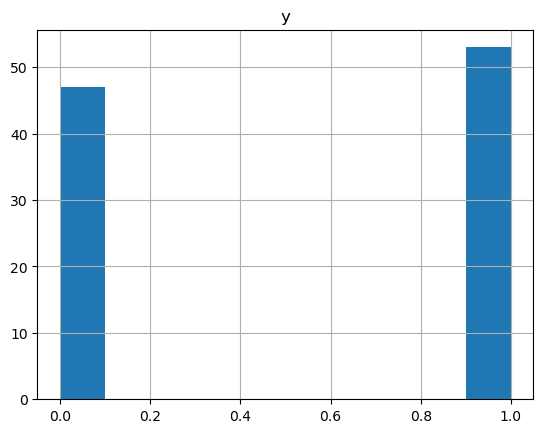

In [37]:
# View a few values of the labels
y.hist()

In [ ]:
# Plot a histogram of the labels


## Train a linear regression model

See [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more details.

In [38]:
# Create an object of type LinearRegression
model = LinearRegression()
model

LinearRegression()

Fit the LinearRegression using the features in `X` and the labels in `y`.  To "fit" the model is another way of saying that we are training the model on the data.

In scikit-learn we simply have to run `.fit(my_data, my_labels)` to start the training.

In [40]:
# Fit the linear regression model
model.fit(X,y)

LinearRegression()

- View the coefficients of the trained model.
- The coefficients are the 'weights' or $\beta$s associated with each feature
- You'll use the coefficients for making predictions.
$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... \beta_N x_N$$

We can access the learned coefficients. They are stored in `.coef_`. 

In [47]:
# View the coefficients of the model
model.coef_

array([[0.00975155, 0.00835816, 0.00836864, 0.00971064]])

### 🎉 Congrats. You just trained a *machine learning model*!

But maybe not everything was done the proper way... 😒

#### Question: What could an issue here?

---
# Part 2: Never trust your model (blindly)!

One of the most general rules in machine learning is that we shouldn't expect that the model will learn the right thing. So be able to judge how good (or bad) our model performs, we have to keep some data hidden from the model to later test the model performance. This is called a **test set**.  

This data is not used for model training. **Never.** 💀

### Train/Test split!

In the example above, we have used all data to train the model. That gives us no means to test how good the model actually is. Now we will split our data in a train and a test set.

Typically such a split is done randomly (we will see more complicated cases in the next weeks). Luckily there are functions we can immediately use for this.

In [48]:
from sklearn.model_selection import train_test_split

# split data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [52]:
# Fit the linear regression model and check the coefficients
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

### Make predictions with a model

So far, we have only trained models, but not really used them. To make a prediction with a model we only need to run the `.predict(my_data)` method.

In [60]:
# Predict labels for X_test
y_predicted = model2.predict(X_test)

In [61]:
# now compare to the actual test labels:
y_predicted

array([[0.58138137],
       [0.65800166],
       [0.50163857],
       [0.49137376],
       [0.34396397],
       [0.32471817],
       [0.85126826],
       [0.41067608],
       [0.69889579],
       [0.91278483],
       [0.25059608],
       [0.32730124],
       [1.15708559],
       [0.60380215],
       [0.60433154],
       [0.75046956],
       [0.60964353],
       [0.57645202],
       [0.08787836],
       [0.61269484],
       [0.67874086],
       [0.62515779],
       [0.47337195],
       [0.59748631],
       [0.48275346]])

In [67]:
from sklearn.linear_model import LogisticRegression

logisticRegressionModel = LogisticRegression()
logisticRegressionModel.fit(X_train, y_train)
y_predicted = logisticRegressionModel.predict(X_test)
y_predicted


c:\Users\Phili\anaconda3\envs\ai_smart_health\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0.])

In [74]:
y_test.values.T - y_predicted

array([[ 0.,  0.,  0., -1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  1., -1.,  0.]])

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted) 
# --------
# [TP, FP]
# [FN, TN]
# --------
# Negatives are ill, in this case we don't want many false negatives

array([[ 3,  4],
       [ 5, 13]], dtype=int64)